# <span style = "color:green"> Stock Price Movement Based on News Headline </span>

***

There are various kinds of new articles and based on that the stock price fluctuates. We will analyze the news heading using sentiment analysis using NLP and then we will predict if the stock will increase or decrease. It is all about stock sentiment analysis

### Content

This dataset is a combination of world news and stock price available on Kaggle. There are 25 columns of top news headlines for each day in the dataframe, Date, and Label (dependent feature). Data range from 2008 to 2016 and the data frame 2000 to 2008 was scrapped from yahoo finance. Labels are based on the Dow Jones Industrial Average stock index.

* Class 1 - Stock Price Increased
* Class 0 - Stock Price Decreased

## Let's Dive into it

### Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

### Read 'stocknews.csv' and store it in a dataframe

In [2]:
data = pd.read_csv('stocknews.csv', encoding = 'ISO-8859-1')

### View head

In [3]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


### View unique values in Label

In [4]:
data['Label'].unique()

array([0, 1], dtype=int64)

### Check for null values

In [5]:
data.isna().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

### Drop null rows

In [6]:
data.dropna(inplace = True)

### Check for duplicates

In [7]:
data.duplicated().sum()

0

### Check info of the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4098 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4098 non-null   object
 1   Label   4098 non-null   int64 
 2   Top1    4098 non-null   object
 3   Top2    4098 non-null   object
 4   Top3    4098 non-null   object
 5   Top4    4098 non-null   object
 6   Top5    4098 non-null   object
 7   Top6    4098 non-null   object
 8   Top7    4098 non-null   object
 9   Top8    4098 non-null   object
 10  Top9    4098 non-null   object
 11  Top10   4098 non-null   object
 12  Top11   4098 non-null   object
 13  Top12   4098 non-null   object
 14  Top13   4098 non-null   object
 15  Top14   4098 non-null   object
 16  Top15   4098 non-null   object
 17  Top16   4098 non-null   object
 18  Top17   4098 non-null   object
 19  Top18   4098 non-null   object
 20  Top19   4098 non-null   object
 21  Top20   4098 non-null   object
 22  Top21   4098 non-null   objec

### Plot a countplot of labels

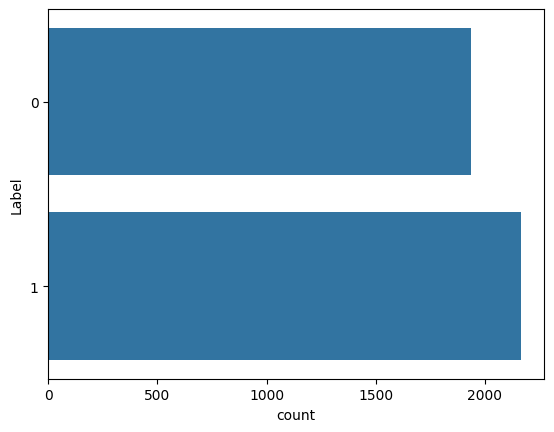

In [9]:
sns.countplot(y = 'Label', data = data)
plt.show()

### Combine all news headlines into a single text and store it in a list

In [10]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,2:27]))

### View one of the combined text

In [11]:
headlines[0]

"A 'hindrance to operations': extracts from the leaked reports Scorecard Hughes' instant hit buoys Blues Jack gets his skates on at ice-cold Alex Chaos as Maracana builds up for United Depleted Leicester prevail as Elliott spoils Everton's party Hungry Spurs sense rich pickings Gunners so wide of an easy target Derby raise a glass to Strupar's debut double Southgate strikes, Leeds pay the penalty Hammers hand Robson a youthful lesson Saints party like it's 1999 Wear wolves have turned into lambs Stump mike catches testy Gough's taunt Langer escapes to hit 167 Flintoff injury piles on woe for England Hunters threaten Jospin with new battle of the Somme Kohl's successor drawn into scandal The difference between men and women Sara Denver, nurse turned solicitor Diana's landmine crusade put Tories in a panic Yeltsin's resignation caught opposition flat-footed Russian roulette Sold out Recovering a title"

### Store the list as a column in our original Dataframe. (Name it Headlines)

In [12]:
data['Headlines'] = headlines

In [13]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Headlines
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title,A 'hindrance to operations': extracts from the...
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite,Scorecard The best lake scene Leader: German s...
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links,Coventry caught on counter by Flo United's riv...
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart,Pilgrim knows how to progress Thatcher facing ...
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft,Hitches and Horlocks Beckham off but United su...


### Only keep Healines and Label in our dataset

In [14]:
data = data[['Headlines','Label']]
data.head()

,Headlines,Label
0,A 'hindrance to operations': extracts from the...,0
1,Scorecard The best lake scene Leader: German s...,0
2,Coventry caught on counter by Flo United's riv...,0
3,Pilgrim knows how to progress Thatcher facing ...,1
4,Hitches and Horlocks Beckham off but United su...,1


### Create a wordcloud of headlines

In [15]:
from wordcloud import WordCloud

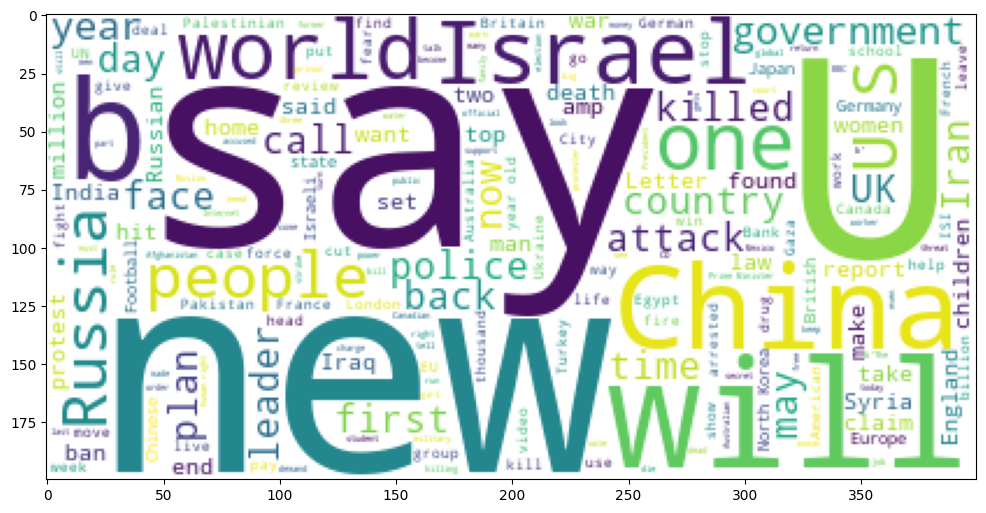

In [16]:
plt.figure(figsize = (12,16))
wordcloud = WordCloud(background_color = 'white').generate(' '.join(data['Headlines'].tolist()))
plt.imshow(wordcloud)
plt.show()

### Create a function to preprocess the text
* Remove any special characters (Symbols)
* Remove any stopwords
* Lemmatize the words
* Convert all words to lowercase

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [18]:
def preprocess(sentence):
    #removes all the special characters and split the sentence at spaces
    text = re.sub(r'[^0-9a-zA-Z]+',' ',sentence).split()
    
    # converts words to lowercase and removes any stopwords
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    # Lemmatize the words
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    
    # convert the list of words back into a sentence
    word = ' '.join(word)
    return word

### Apply the function on Headlines column

In [20]:
data['Headlines'] = data['Headlines'].apply(preprocess)

In [147]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Headlines
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title,a hindrance operations extract leak report sco...
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite,scorecard the best lake scene leader german sl...
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links,coventry catch counter flo unite rival road ri...
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart,pilgrim know progress thatcher face ban mcilro...
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft,hitch horlocks beckham unite survive breast ca...


### Print some of the processed text

In [150]:
for i in range(5):
    print(data['Headlines'][i])

a hindrance operations extract leak report scorecard hughes instant hit buoy blue jack get skate ice cold alex chaos maracana build unite deplete leicester prevail elliott spoil everton party hungry spur sense rich pick gunners wide easy target derby raise glass strupar debut double southgate strike leeds pay penalty hammer hand robson youthful lesson saint party like 1999 wear wolves turn lamb stump mike catch testy gough taunt langer escape hit 167 flintoff injury pile woe england hunters threaten jospin new battle somme kohl successor draw scandal the difference men women sara denver nurse turn solicitor diana landmine crusade put tories panic yeltsin resignation catch opposition flat foot russian roulette sell recover title
scorecard the best lake scene leader german sleaze inquiry cheerio boyo the main recommendations have cubie kill fee have cubie kill fee have cubie kill fee hopkins furious foster lack hannibal appetite have cubie kill fee a tale two tail i say i like i like i s

### Assign input and Target Variables

* X - Headlines
* y - Label

In [16]:
X = data['Headlines']
y = data['Label']

### Apply TfidfVectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer(ngram_range=(2,2))

In [19]:
X = vectorizer.fit_transform(X)

In [20]:
type(X)

scipy.sparse.csr.csr_matrix

### Split the dataset into training and Testing set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### Check the shape of X_train and X_test

In [23]:
X_train.shape

(3278, 619757)

In [24]:
X_test.shape

(820, 619757)

### Create an SVM model and Train it

In [25]:
from sklearn.svm import SVC

In [26]:
model = SVC()

In [27]:
model.fit(X_train, y_train)

SVC()

### Check the score of the training set

In [28]:
model.score(X_train, y_train)

1.0

### Make predictions with X_test

In [29]:
prediction = model.predict(X_test)

### Check the accuracy of our prediction

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
accuracy_score(y_test, prediction)

0.55

### Create confusion matrix and plot it on a heatmap

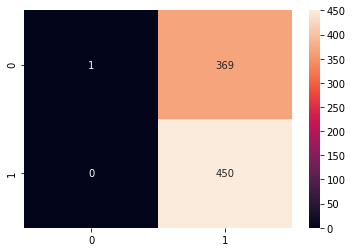

In [32]:
sns.heatmap(confusion_matrix(y_test,prediction),annot = True, fmt = 'd')
plt.show()

### Print Classification Report

In [33]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       370
           1       0.55      1.00      0.71       450

    accuracy                           0.55       820
   macro avg       0.77      0.50      0.36       820
weighted avg       0.75      0.55      0.39       820

